Descargando datos de temperatura...
Datos de temperatura: (49920, 4)
Descargando datos de calidad del aire...
Datos de calidad del aire: (49920, 4)


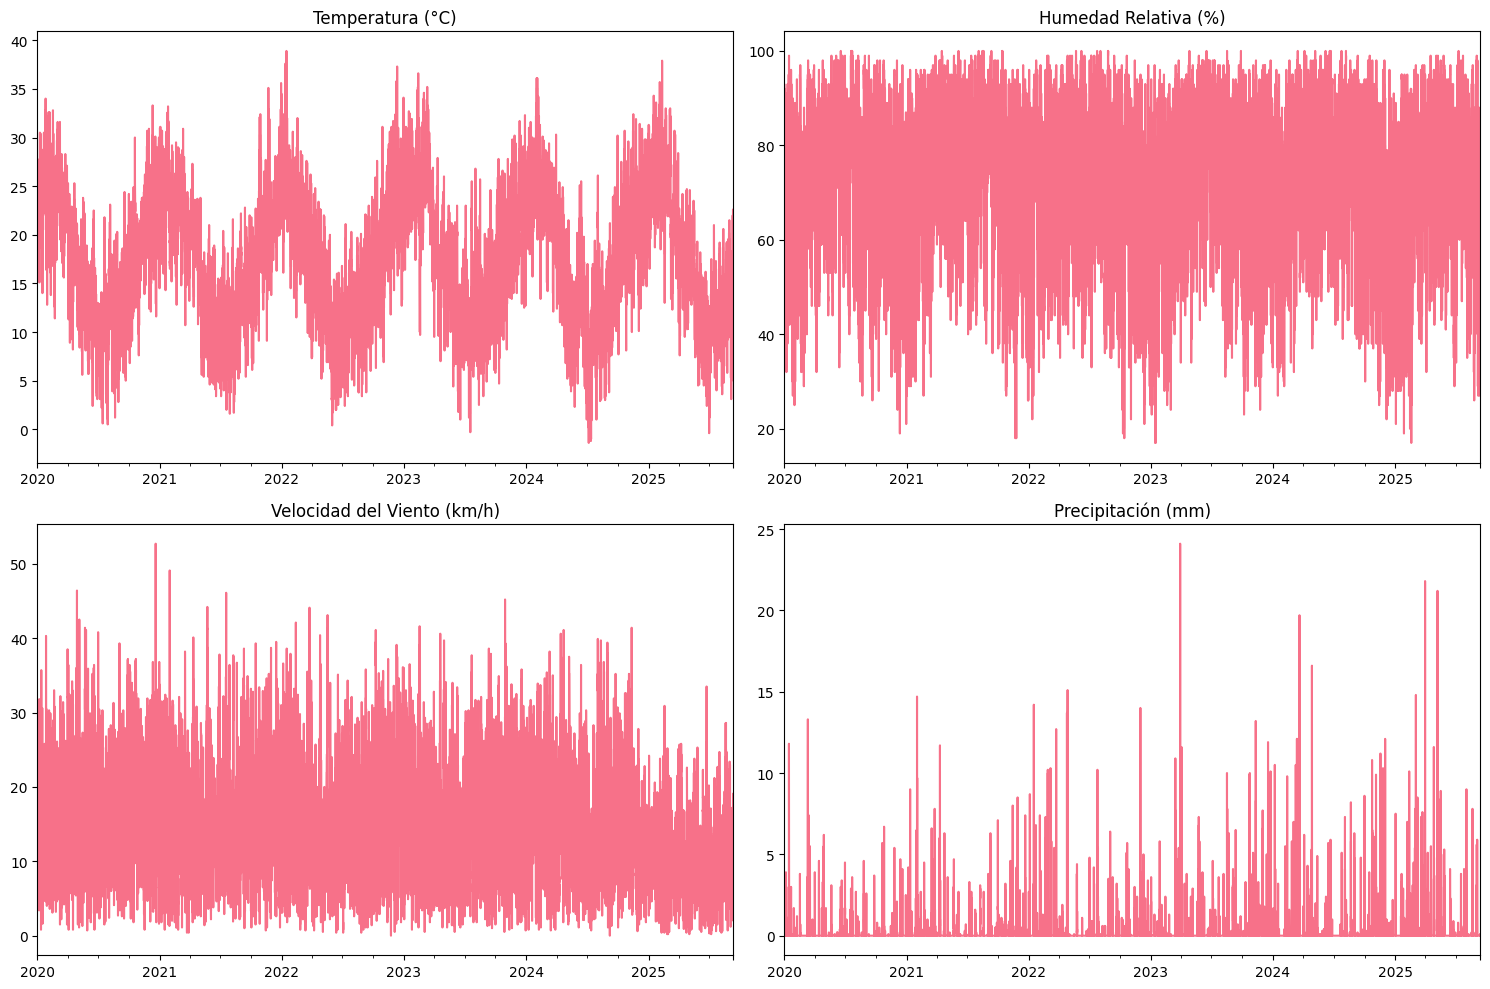

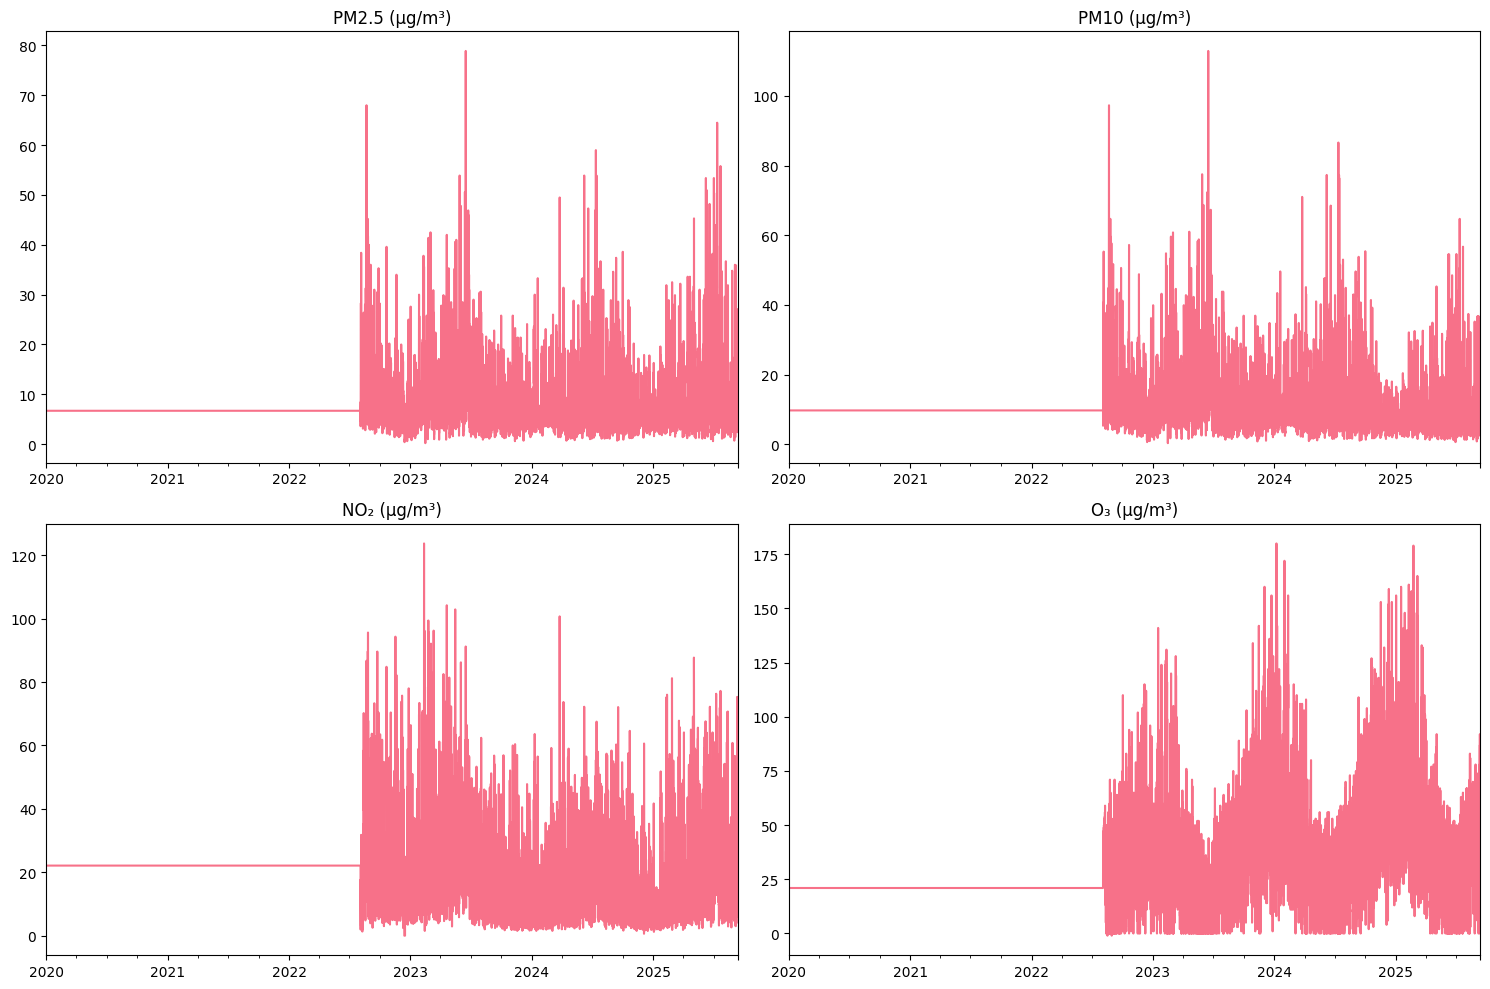

Análisis de estacionalidad - Temperatura


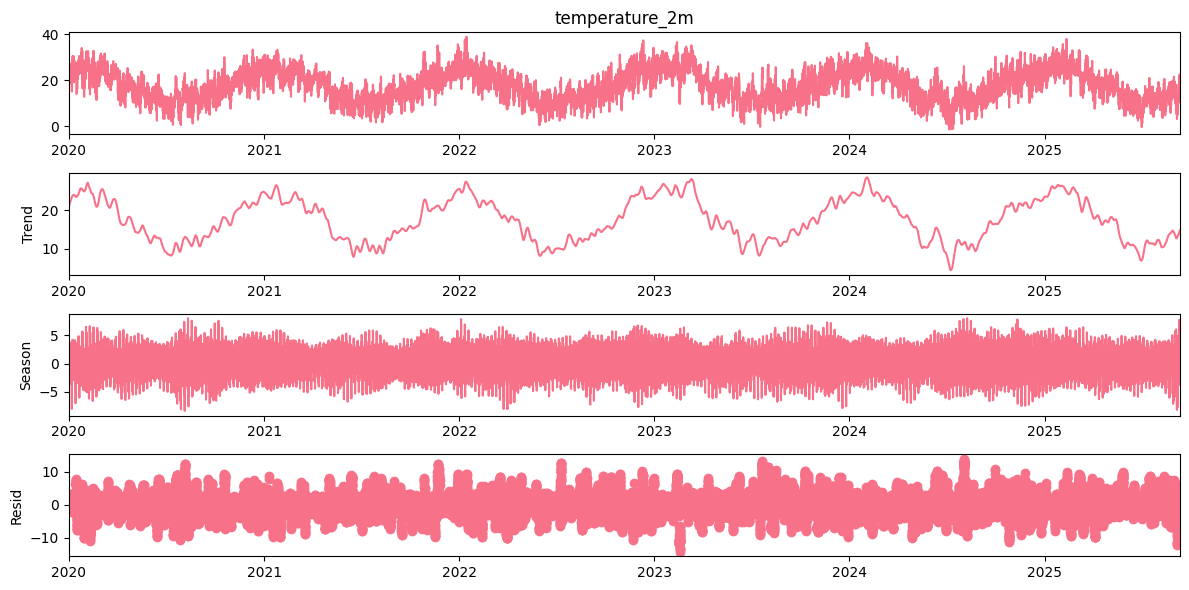

Análisis de estacionalidad - PM2.5


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ts_weather_pipeline.api import fetch_open_meteo_archive
from ts_weather_pipeline.preprocessing import fill_and_resample
from ts_weather_pipeline.analysis import adf_test, plot_decomposition, plot_fft, plot_pollutant_correlation

# Configuración de visualización
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette("husl")

# Descargar datos de temperatura
print("Descargando datos de temperatura...")
df_temp = fetch_open_meteo_archive(
    lat=-34.6037, 
    lon=-58.3816, 
    start_date="2020-01-01",
    end_date="2025-09-10",
    hourly_vars=["temperature_2m", "relativehumidity_2m", "windspeed_10m", "precipitation"]
)
df_temp = fill_and_resample(df_temp, freq="H")
print(f"Datos de temperatura: {df_temp.shape}")

# Descargar datos de calidad del aire
print("Descargando datos de calidad del aire...")
df_air = fetch_open_meteo_archive(
    lat=-34.6037, 
    lon=-58.3816, 
    start_date="2020-01-01",
    end_date="2025-09-10",
    hourly_vars=["pm2_5", "pm10", "nitrogen_dioxide", "ozone"]
)
df_air = fill_and_resample(df_air, freq="H")
print(f"Datos de calidad del aire: {df_air.shape}")

# Visualizar datos de temperatura
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
df_temp['temperature_2m'].plot(ax=axes[0, 0], title='Temperatura (°C)')
df_temp['relativehumidity_2m'].plot(ax=axes[0, 1], title='Humedad Relativa (%)')
df_temp['windspeed_10m'].plot(ax=axes[1, 0], title='Velocidad del Viento (km/h)')
df_temp['precipitation'].plot(ax=axes[1, 1], title='Precipitación (mm)')
plt.tight_layout()
plt.show()

# Visualizar datos de calidad del aire
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
if 'pm2_5' in df_air.columns:
    df_air['pm2_5'].plot(ax=axes[0, 0], title='PM2.5 (μg/m³)')
if 'pm10' in df_air.columns:
    df_air['pm10'].plot(ax=axes[0, 1], title='PM10 (μg/m³)')
if 'nitrogen_dioxide' in df_air.columns:
    df_air['nitrogen_dioxide'].plot(ax=axes[1, 0], title='NO₂ (μg/m³)')
if 'ozone' in df_air.columns:
    df_air['ozone'].plot(ax=axes[1, 1], title='O₃ (μg/m³)')
plt.tight_layout()
plt.show()

# Análisis de estacionalidad - Temperatura
print("Análisis de estacionalidad - Temperatura")
plot_decomposition(df_temp['temperature_2m'].dropna(), period=24*7)  # Estacionalidad semanal

# Análisis de estacionalidad - PM2.5 (si disponible)
if 'pm2_5' in df_air.columns:
    print("Análisis de estacionalidad - PM2.5")
    plot_decomposition(df_air['pm2_5'].dropna(), period=24*7)

# Análisis espectral (FFT)
print("Análisis espectral - Temperatura")
plot_fft(df_temp['temperature_2m'], fs=1.0)

print("Análisis espectral - Calidad del Aire")
plot_fft(df_air['pm2_5'], fs=1.0)

# Correlación entre contaminantes
if all(col in df_air.columns for col in ['pm2_5', 'pm10', 'nitrogen_dioxide']):
    plot_pollutant_correlation(df_air, pollutants=['pm2_5', 'pm10', 'nitrogen_dioxide'])

# Correlación entre variables meteorológicas y contaminantes
if not df_air.empty and not df_temp.empty:
    combined_df = df_temp.join(df_air, how='inner')
    correlation_matrix = combined_df.corr()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Matriz de Correlación: Variables Meteorológicas vs Contaminantes')
    plt.tight_layout()
    plt.show()

# Guardar datos 
# df_temp.to_csv('../data/temperature_data.csv')
# df_air.to_csv('../data/air_quality_data.csv')
# print("Datos guardados en data/temperature_data.csv y data/air_quality_data.csv")